# Data Analysis using PySpark

In [21]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as sum_, col 
from mylib.extract import extract
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
extract()
spark = SparkSession.builder.appName("grade_student").getOrCreate()
try:
    df = spark.read.csv('data/grad-students.csv', inferSchema=True, header=True)
except Exception as e:
    print(f"Error reading CSV: {e}")

File successfully downloaded to data/grad-students.csv


In [35]:
#show the data
df.show(5)
df.describe()

+----------+--------------------+--------------------+----------+----------------+-------------+-------------------------+---------------+----------------------+-----------+--------+--------+-------------+----------------+----------------------------+------------------+-------------------------+--------------+-----------+-----------+-----------+------------+
|Major_code|               Major|      Major_category|Grad_total|Grad_sample_size|Grad_employed|Grad_full_time_year_round|Grad_unemployed|Grad_unemployment_rate|Grad_median|Grad_P25|Grad_P75|Nongrad_total|Nongrad_employed|Nongrad_full_time_year_round|Nongrad_unemployed|Nongrad_unemployment_rate|Nongrad_median|Nongrad_P25|Nongrad_P75| Grad_share|Grad_premium|
+----------+--------------------+--------------------+----------+----------------+-------------+-------------------------+---------------+----------------------+-----------+--------+--------+-------------+----------------+----------------------------+------------------+--------

DataFrame[summary: string, Major_code: string, Major: string, Major_category: string, Grad_total: string, Grad_sample_size: string, Grad_employed: string, Grad_full_time_year_round: string, Grad_unemployed: string, Grad_unemployment_rate: string, Grad_median: string, Grad_P25: string, Grad_P75: string, Nongrad_total: string, Nongrad_employed: string, Nongrad_full_time_year_round: string, Nongrad_unemployed: string, Nongrad_unemployment_rate: string, Nongrad_median: string, Nongrad_P25: string, Nongrad_P75: string, Grad_share: string, Grad_premium: string]

In [7]:
#summary the data
df.printSchema()

root
 |-- Major_code: integer (nullable = true)
 |-- Major: string (nullable = true)
 |-- Major_category: string (nullable = true)
 |-- Grad_total: integer (nullable = true)
 |-- Grad_sample_size: integer (nullable = true)
 |-- Grad_employed: integer (nullable = true)
 |-- Grad_full_time_year_round: integer (nullable = true)
 |-- Grad_unemployed: integer (nullable = true)
 |-- Grad_unemployment_rate: double (nullable = true)
 |-- Grad_median: double (nullable = true)
 |-- Grad_P25: integer (nullable = true)
 |-- Grad_P75: double (nullable = true)
 |-- Nongrad_total: integer (nullable = true)
 |-- Nongrad_employed: integer (nullable = true)
 |-- Nongrad_full_time_year_round: integer (nullable = true)
 |-- Nongrad_unemployed: integer (nullable = true)
 |-- Nongrad_unemployment_rate: double (nullable = true)
 |-- Nongrad_median: double (nullable = true)
 |-- Nongrad_P25: integer (nullable = true)
 |-- Nongrad_P75: double (nullable = true)
 |-- Grad_share: double (nullable = true)
 |-- Gra

In [36]:

df.show()
df.count()

+----------+--------------------+--------------------+----------+----------------+-------------+-------------------------+---------------+----------------------+-----------+--------+--------+-------------+----------------+----------------------------+------------------+-------------------------+--------------+-----------+-----------+-----------+------------+
|Major_code|               Major|      Major_category|Grad_total|Grad_sample_size|Grad_employed|Grad_full_time_year_round|Grad_unemployed|Grad_unemployment_rate|Grad_median|Grad_P25|Grad_P75|Nongrad_total|Nongrad_employed|Nongrad_full_time_year_round|Nongrad_unemployed|Nongrad_unemployment_rate|Nongrad_median|Nongrad_P25|Nongrad_P75| Grad_share|Grad_premium|
+----------+--------------------+--------------------+----------+----------------+-------------+-------------------------+---------------+----------------------+-----------+--------+--------+-------------+----------------+----------------------------+------------------+--------

173

              Major_category  Total_Nongrad_employed  Total_Grad_employed
0                  Education               2659824.0            2437166.0
1                Engineering               2483802.0            1634563.0
2        Law & Public Policy                664417.0             224832.0
3             Social Science               1720445.0            1381570.0
4  Humanities & Liberal Arts               2289696.0            1986572.0


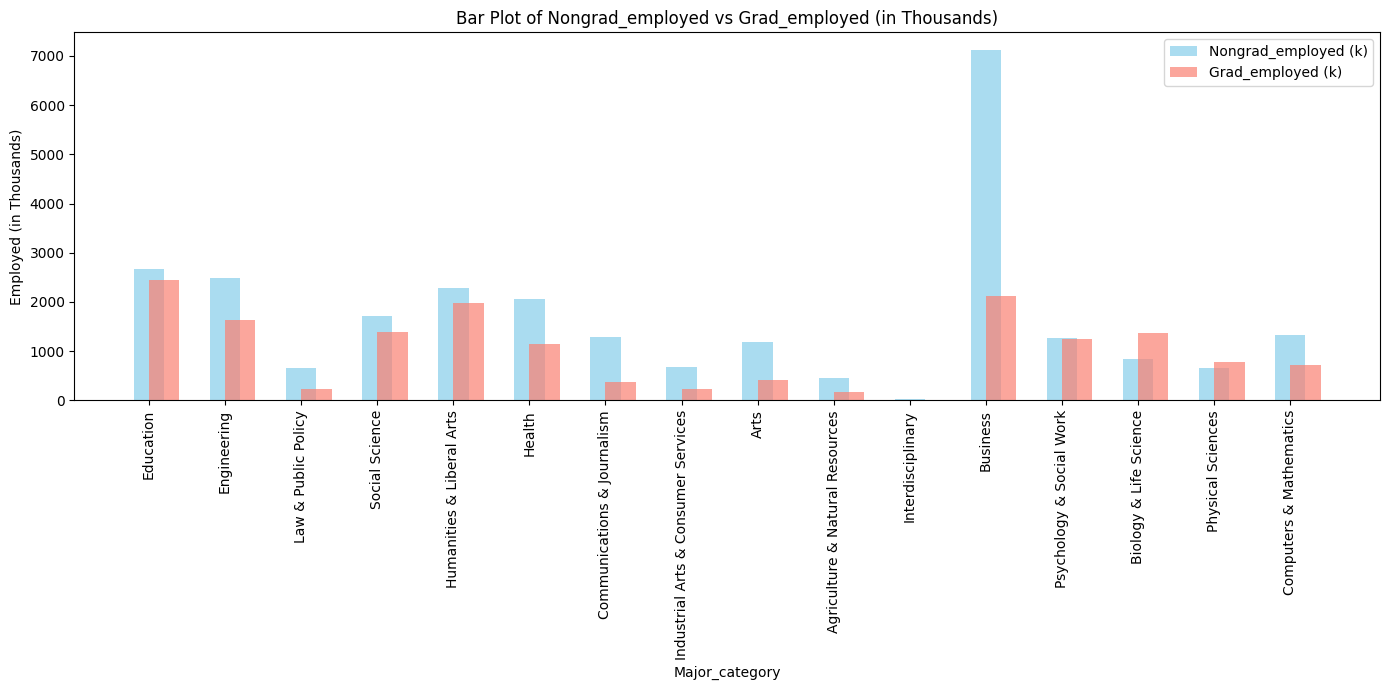

In [30]:

# Ensure 'Nongrad_employed' and 'Grad_employed' are numeric (double)
df = df.withColumn("Nongrad_employed", col("Nongrad_employed").cast("double"))
df = df.withColumn("Grad_employed", col("Grad_employed").cast("double"))

# Group by 'Major_category' and aggregate 'Nongrad_employed' and 'Grad_employed' using sum
data_by_major = df.groupBy("Major_category").agg(
    sum_("Nongrad_employed").alias("Total_Nongrad_employed"),
    sum_("Grad_employed").alias("Total_Grad_employed")
)

# Convert the grouped DataFrame to Pandas for easier handling with Matplotlib
pandas_df = data_by_major.toPandas()

# Check the first few rows to ensure data looks correct
print(pandas_df.head())

# Scale the data to thousands (k)
pandas_df['Total_Nongrad_employed_k'] = pandas_df['Total_Nongrad_employed'] / 1000
pandas_df['Total_Grad_employed_k'] = pandas_df['Total_Grad_employed'] / 1000

# Plotting the bar charts for both 'Total_Grad_employed' and 'Total_Nongrad_employed'
plt.figure(figsize=(14, 7))

# Bar plot for 'Total_Nongrad_employed' vs 'Total_Grad_employed'
x_labels = pandas_df['Major_category']  # Categories on x-axis

plt.bar(x_labels, pandas_df['Total_Nongrad_employed_k'], color='skyblue', label='Nongrad_employed (k)', alpha=0.7, width=0.4, align='center')
plt.bar(x_labels, pandas_df['Total_Grad_employed_k'], color='salmon', label='Grad_employed (k)', alpha=0.7, width=0.4, align='edge')

# Add titles and labels
plt.title('Bar Plot of Nongrad_employed vs Grad_employed (in Thousands)')
plt.xlabel('Major_category')
plt.ylabel('Employed (in Thousands)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [34]:
pandas_df["Major_category"].unique()

array(['Education', 'Engineering', 'Law & Public Policy',
       'Social Science', 'Humanities & Liberal Arts', 'Health',
       'Communications & Journalism',
       'Industrial Arts & Consumer Services', 'Arts',
       'Agriculture & Natural Resources', 'Interdisciplinary', 'Business',
       'Psychology & Social Work', 'Biology & Life Science',
       'Physical Sciences', 'Computers & Mathematics'], dtype=object)